Data is downloaded from 
https://archive.usgs.gov/archive/sites/speclab.cr.usgs.gov/spectral.lib06/ds231/datatable.html

W1R1Bb ASCII data for each endmember.

For endmember : olivinefo80
(151, 3)
For endmember : olivinefo51
(151, 3)
For endmember : augite
(151, 3)
For endmember : labradorite
(151, 3)
For endmember : pigeonite
(151, 3)
For endmember : magnetite
(151, 3)
405


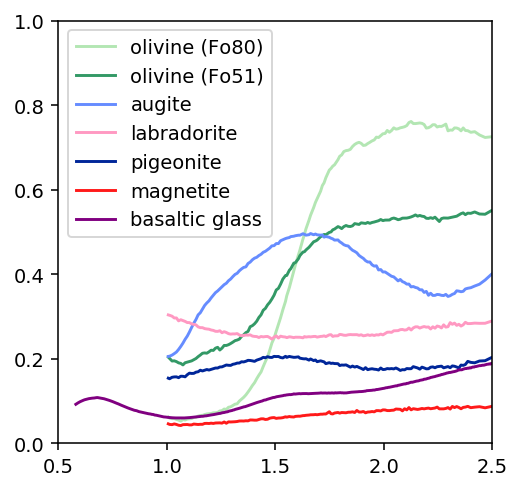

In [1]:
from utils.plotting import *
plot_endmembers()

For endmember : olivinefo80
(211, 3)
For endmember : olivinefo51
(211, 3)
For endmember : augite
(211, 3)
For endmember : labradorite
(211, 3)
For endmember : pigeonite
(211, 3)
For endmember : magnetite
(211, 3)


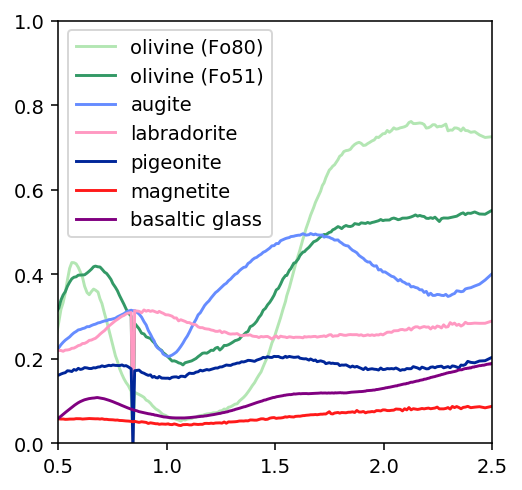

In [3]:
from utils.plotting import *
plot_endmembers()

## Handling CRISM data

Download all the data on the PDS site, open the .hdr TRDR image in CAT ENVI, convert PDS to CAT, save, and then open here.  

Use library called Spectral Python (SPy) http://www.spectralpython.net/user_guide.html to access the data and manipulate it in Numpy. 

In [1]:
# Select data source & pull down data

import numpy as np
from spectral import *
import spectral.io.envi as envi
from utils.constants import *
from utils.access_data import *
%matplotlib inline



In [3]:
d=get_CRISM_data()

here
/Users/marina/Documents/PhD/research/mars_research/code/spectral_analysis/utils/../../../data/20200420T120530535238/cartorder/ato0002ec79_01_if169l_trr3_CAT.img.hdr
/Users/marina/Documents/PhD/research/mars_research/code/spectral_analysis/utils/../../../data/20200420T120530535238/cartorder/ato0002ec79_01_if169l_trr3_CAT.img
	Data Source:   '/Users/marina/Documents/PhD/research/mars_research/code/spectral_analysis/utils/../../../data/20200420T120530535238/cartorder/ato0002ec79_01_if169l_trr3_CAT.img'
	# Rows:            178
	# Samples:         640
	# Bands:           438
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32


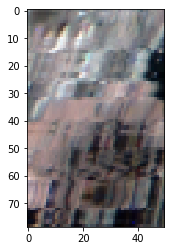

In [5]:

bands = (4, 80, 100)
view = imshow(data=d, bands=bands)

In [2]:
record_reduced_spectra()

For endmember : olivine (Fo80)
(480, 3)
not adding 2.624

 All reduced spectra should have same length 
CRISM : 184
USGS 184
BASALT 184


/Users/marina/Documents/PhD/research/mars_research/code/spectral_analysis/utils/access_data.py:102: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  CRISM_data = pd.read_csv(crism_dir + "../wavelengths/z.txt", sep="  ", header=0)


In [6]:
with open(MODULE_DIR + "/utils/FILE_CONSTANTS/RW_BASALT.pickle", 'rb') as handle:
    basaltrw = pickle.load(handle)
with open(MODULE_DIR + "/utils/FILE_CONSTANTS/RW_USGS.pickle", 'rb') as handle:
    RW_USGS = pickle.load(handle)
with open(MODULE_DIR + "/utils/FILE_CONSTANTS/RW_CRISM.pickle", 'rb') as handle:
    RW_CRISM = pickle.load(handle)

In [ ]:
for index, val in enumerate(basaltrw):
    basalt = val
    usgs = RW_USGS[index]
    crism = RW_CRISM[index]
    print(str(basalt) + "  vs.  " + str(usgs ) +  "  vs.  " + str(crism))

In [8]:
def print_info(vals, name):
    print(name)
    print("size : " + str(len(vals)))
    print("Min : " + str(min(vals)))
    print("Max : " + str(max(vals)))
print_info(vals=BASALTIC_GLASS_wavelengths, name="\nBasaltic glass")
print_info(vals=OLIVINE_Fo51_data['wavelength'].values.tolist(), name="\nOlivine Fo51")
print_info(vals=CRISM_data['wavelength'].values.tolist(), name="\nCRISM")


Basaltic glass
size : 465
Min : 0.28
Max : 2.6

Olivine Fo51
size : 480
Min : 0.2051
Max : 2.976

CRISM
size : 438
Min : 1.00135
Max : 4.0
